## Reporte Hito 3: Grupo 11

#### Integrantes: Thomas Aguilera I Lucas Alarcón I Benjamín Torrealba I Sebastian Acuña I Nicolás Acevedo

## Introducción

**Motivacion**: En el panorama actual, existen conocidas brechas salariales a nivel mundial que afectan directamente al bienestar y la calidad de vida de una sociedad y que se asocian, entre otros, con el género, la raza o el nivel de educación de una persona. En ese sentido, resulta crucial comprender cuáles son los factores más influyentes en las diferencias salariales de una sociedad, de modo que se puedan aplicar políticas públicas efectivas que brinden equidad de oportunidades a los miembros de una comunidad.

[Seba]

**Descripción del Dataset y Exploración** 


Este dataset contiene información económica y demográfica de personas en los Estados Unidos, la información proviene de un censo realizado el año 1994 [[link](https://archive.ics.uci.edu/dataset/20/census+income)]. Esto nos entregará un panorama general de la sociedad Estadounidense y eventualmente enteneder patrones que definen el ingreso de las personas. El datset está siendo descargado desde [[Fuente Dataset](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Census%20Income)]



A continuación se realizará una breve descripción del Dataset. 

[Benja]

**Explicación de 15 columnas**

**Numéricas (6):**

 - age: Edad del individuo
 - fnlwgt: Final Weight **
 - education_num: Cantidad de años de estudio
 - capital_gain: Cantidad de capital ganado
 - capital_loss: Cantidad de capital perdido
 - hours_per_week: Cantidad de horas laborales a la semana

**Categóricas (9):**

 - workclass: Tipo de trabajo
 - education: Nivel de educación
 - marital_status: Estado marital
 - occupation: Trabajo del individuo
 - relationship: Relación familiar
 - race: Raza del individuo
 - sex: sexo del individuo
 - native-country: País de origen

** Final weight es una escala que toma como referencia a caracteristicas demograficas de un individuo. 
Dos individuos con fnlwgt parecidos tienen caracteristicas demograficas parecidas. \
[Lucas]

## Análisis y gráficos

In [2]:
# imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

In [3]:
url = 'https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Census%20Income/adult.data.csv'
response = requests.get(url)
data = response.text

with open('adult.data.csv', 'w') as f:
    f.write(data)

df_original = pd.read_csv('adult.data.csv', header=None)

# cols

df_original.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df= df_original.copy()
print('Cantidad de registros: ', df.shape[0])

Cantidad de registros:  32561


In [4]:
df_clustering_clustering  = df

In [41]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


En primer lugar realizarémos una revisión general del dataframe, identificació de registros duplicados y vacíos:

In [42]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
90%,58.000000,3.290540e+05,13.000000,0.000000,0.000000,55.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000


De esta primera exploración (solo columnas numericas) se identifica la existencia de outliers, estos son evidentes en las columnas de 'capital_gain', 'capital_loss' y 'hours_per_week'. Esto es solo una vista general por lo que se deben revisar las columnas por separado para poder eliminar aquellos regitros que correspondan a outliers. 

Además se observa una gran cantidad de ceros en las columnas 'capital_gain' y 'capital_loss' esto a priori podría ser problemático, sin embargo se debe estudiar con más detalle y la correlación con variable a predecir.

[Benja]

### Tratamiento de nulos

In [43]:
nan_values = df.isna().sum()
print('Cantidad de valores nulos por columna: ')
print(nan_values)

Cantidad de valores nulos por columna: 
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Se observa que no existen valores nulos en el dataset por lo tanto, no es necesario imputar o eliminar nulos. 

[Benja]

### Tratamiento de Duplicados

Se eliminan los registros duplicados y se les asigna un id único a los registros

In [44]:
print('Cantidad de registros pre eliminación de duplicados: ', df.shape[0])

# contamos registros duplicados
duplicates = df.duplicated().sum()
print('Cantidad de registros duplicados: ', duplicates)

# eliminamos registros duplicados
df.drop_duplicates(inplace=True)

# agregamos columna id
df.insert(loc=0, column='id', value=range(0,len(df)))

print('Cantidad de registros post eliminación de duplicados: ', df.shape[0])

Cantidad de registros pre eliminación de duplicados:  32561
Cantidad de registros duplicados:  24
Cantidad de registros post eliminación de duplicados:  32537


### Agregación de columnas

In [45]:
# sobre y sub 40hrs/semana
df['hours_per_week_vs_mean'] = df['hours_per_week'].apply(lambda x: '>40' if x > 40 else '<=40')
df['american'] = df['native_country'].apply(lambda x: 1 if x == 'United-States' else 0)
df['capital_binary'] = df['capital_gain'].apply(lambda x: 1 if x != 0 else 0)
# [Lucas]

### Gráficos univariados y manejo de outliers

Text(0, 0.5, 'Frequency')

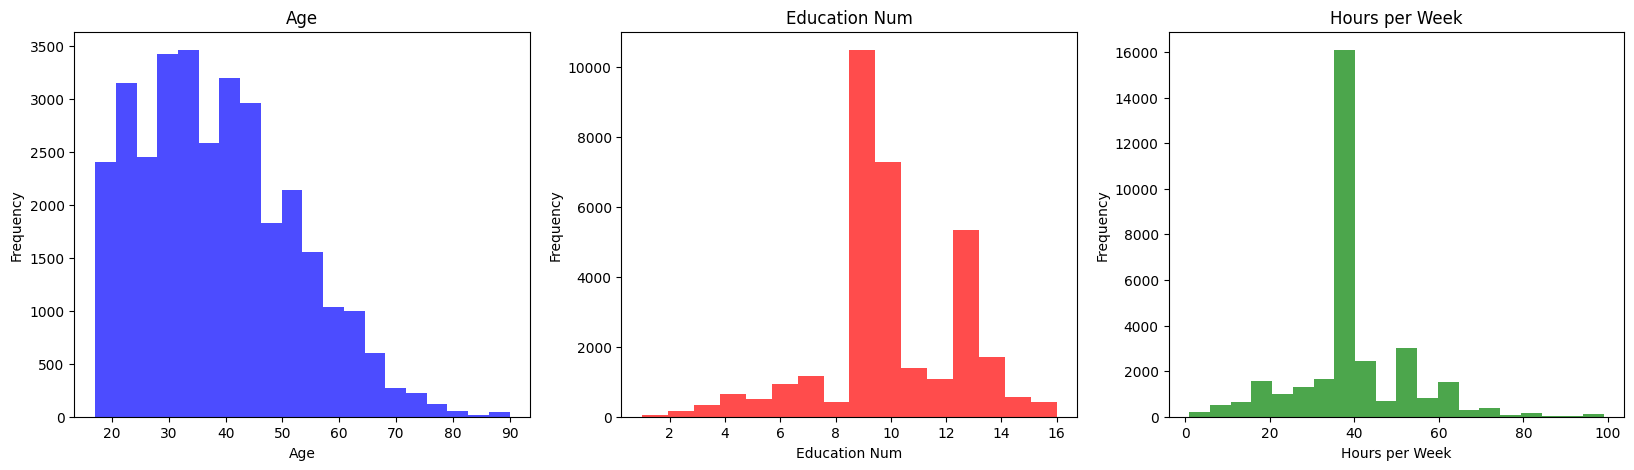

In [46]:
# hisotgramas de age, education_num y hours_per_week

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='blue', alpha=0.7)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['education_num'], bins=16, color='red', alpha=0.7)
plt.title('Education Num')
plt.xlabel('Education Num')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['hours_per_week'], bins=20, color='green', alpha=0.7)
plt.title('Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# [Benja]

A partir de estos histogramas, notamos que la distribución de edad no es homogénea, lo que nos hace entender que para obtener la información del censo original no se realizó ningún muestreo estratificado, es decir, la información en lo que refiere a la edad mostraría la distribución real de la sociedad en ese momento.

Con respecto a 'Education Num', notamos que gran parte de la población se centra en 9 y 10, lo cual se explica al considerar que la secundaria acaba en el 10mo año de estudios. Además, se identifica otro grupo predominante correspondiente al año 13, que correspondería a bachiller o grado superior.  [[ref](https://www.traveltuition.com/blog/como-es-el-sistema-educativo-en-estados-unidos)] 

Con respecto a las horas trabajadas a la semana, notamos que la gran mayoría se encuentra por debajo de las 40 horas; también se identifican outliers con cerca de 100 horas a la semana (que corresponderían a 14 horas al día).


[Benja]

Text(0.5, 1.0, 'Hours per Week')

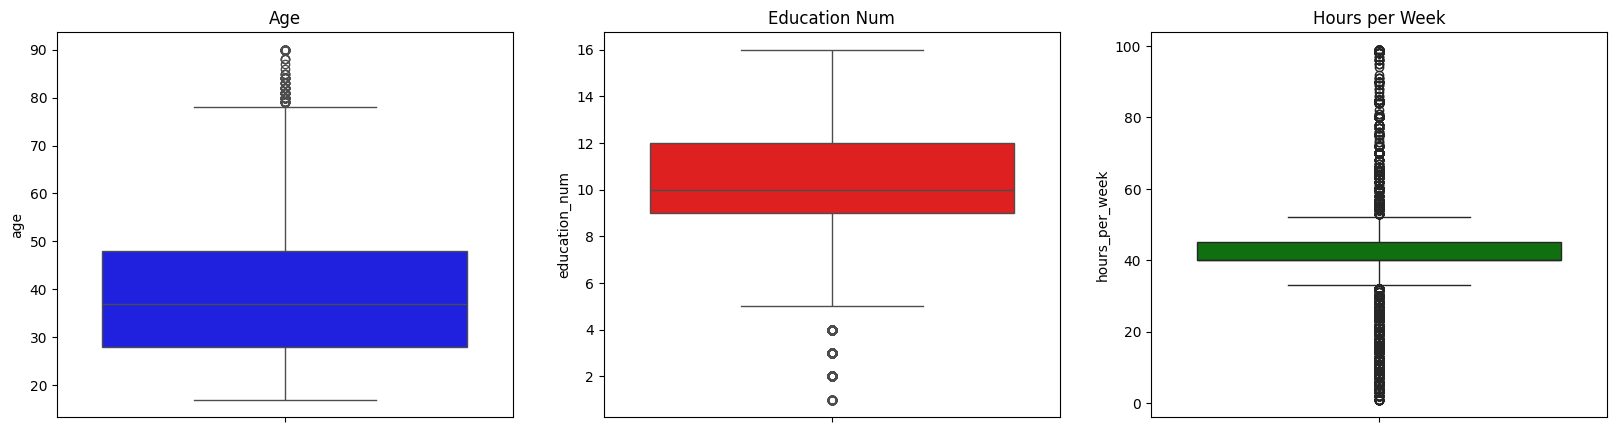

In [47]:
# boxplot de age, education_num y hours_per_week
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='age', data=df, color='blue')
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y='education_num', data=df, color='red')
plt.title('Education Num')

plt.subplot(1, 3, 3)
sns.boxplot(y='hours_per_week', data=df, color='green')
plt.title('Hours per Week')

# [Benja]

Text(0, 0.5, 'Frequency')

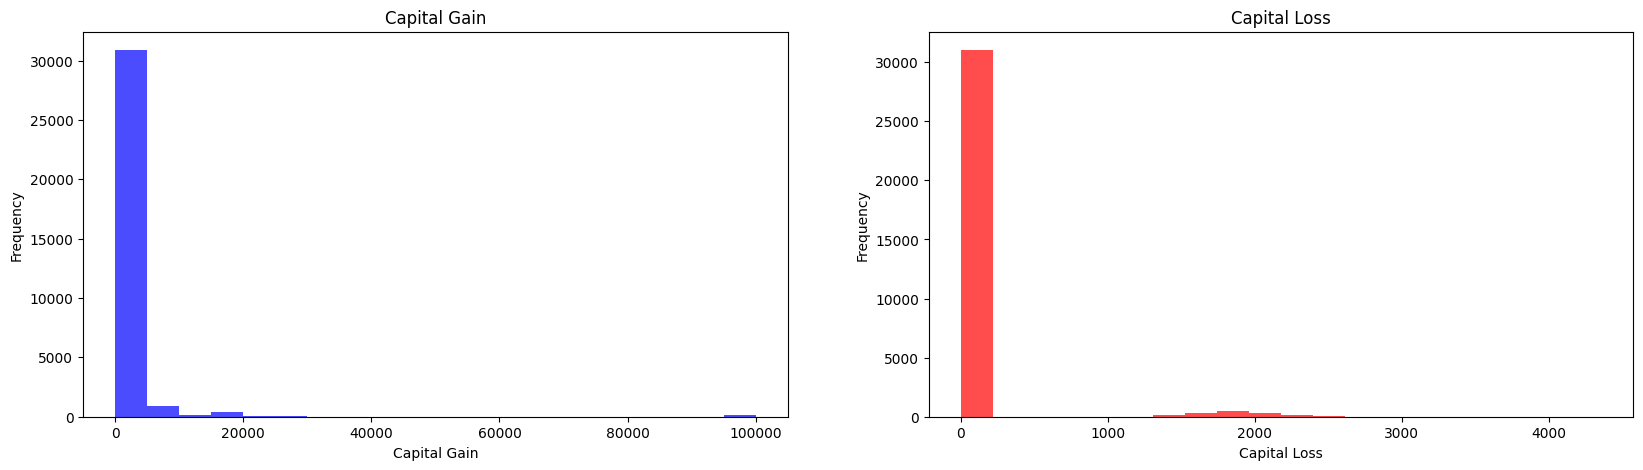

In [48]:
# histogramas capital_gain y capital_loss
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins=20, color='blue', alpha=0.7)
plt.title('Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['capital_loss'], bins=20, color='red', alpha=0.7)
plt.title('Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')

# [Benja]

De estos graficos se puede observar un que ambas variables están muy cargadas al cero, además de esto notamos grupos minoritarios con valores positivos, esto podrían ser outliers que podrían eliminarse, sin embargo como equipo se decidió esperar ya que puede que estos valores sean muy determinantes a la hora de desarrollar el modelo y que efectivamente no sean outliers.

[Benja]

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Se realiza un conteo
conteo_race = df.groupby('race').size().reset_index(name='count')

# Se ordena DataFrame por 'count' en orden descendente
conteo_race_sorted = conteo_race.sort_values(by='count', ascending=False)

# Se crea el treemap
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"type": "treemap"}, {"type": "table"}]]
)

# Se agrega el treemap a la figura
fig.add_trace(
    go.Treemap(
        labels=conteo_race_sorted['race'],
        parents=[""] * len(conteo_race_sorted),
        values=conteo_race_sorted['count'],
        name=""
    ),
    row=1, col=1
)

# Se agrega la tabla ordenada a la figura
fig.add_trace(
    go.Table(
        header=dict(values=['Race', 'Count']),
        cells=dict(values=[conteo_race_sorted['race'], conteo_race_sorted['count']])
    ),
    row=1, col=2
)

# Se actualiza el layout de la figura para que no haya título en el treemap y ajustar el tamaño
fig.update_layout(
    title_text='Recuento de registros por raza con tabla correspondiente',
    width=1080,
    height=840
)

# [Thomas]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 0.63], 'y': [0.0, 1.0]},
              'labels': array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
                               ' Other'], dtype=object),
              'name': '',
              'parents': [, , , , ],
              'type': 'treemap',
              'values': array([27795,  3122,  1038,   311,   271], dtype=int64)},
             {'cells': {'values': [[' White', ' Black', ' Asian-Pac-Islander', '
                                   Amer-Indian-Eskimo', ' Other'], [27795, 3122,
                                   1038, 311, 271]]},
              'domain': {'x': [0.73, 1.0], 'y': [0.0, 1.0]},
              'header': {'values': ['Race', 'Count']},
              'type': 'table'}],
    'layout': {'height': 840,
               'template': '...',
               'title': {'text': 'Recuento de registros por raza con tabla correspondiente'},
               'width': 1080}
})

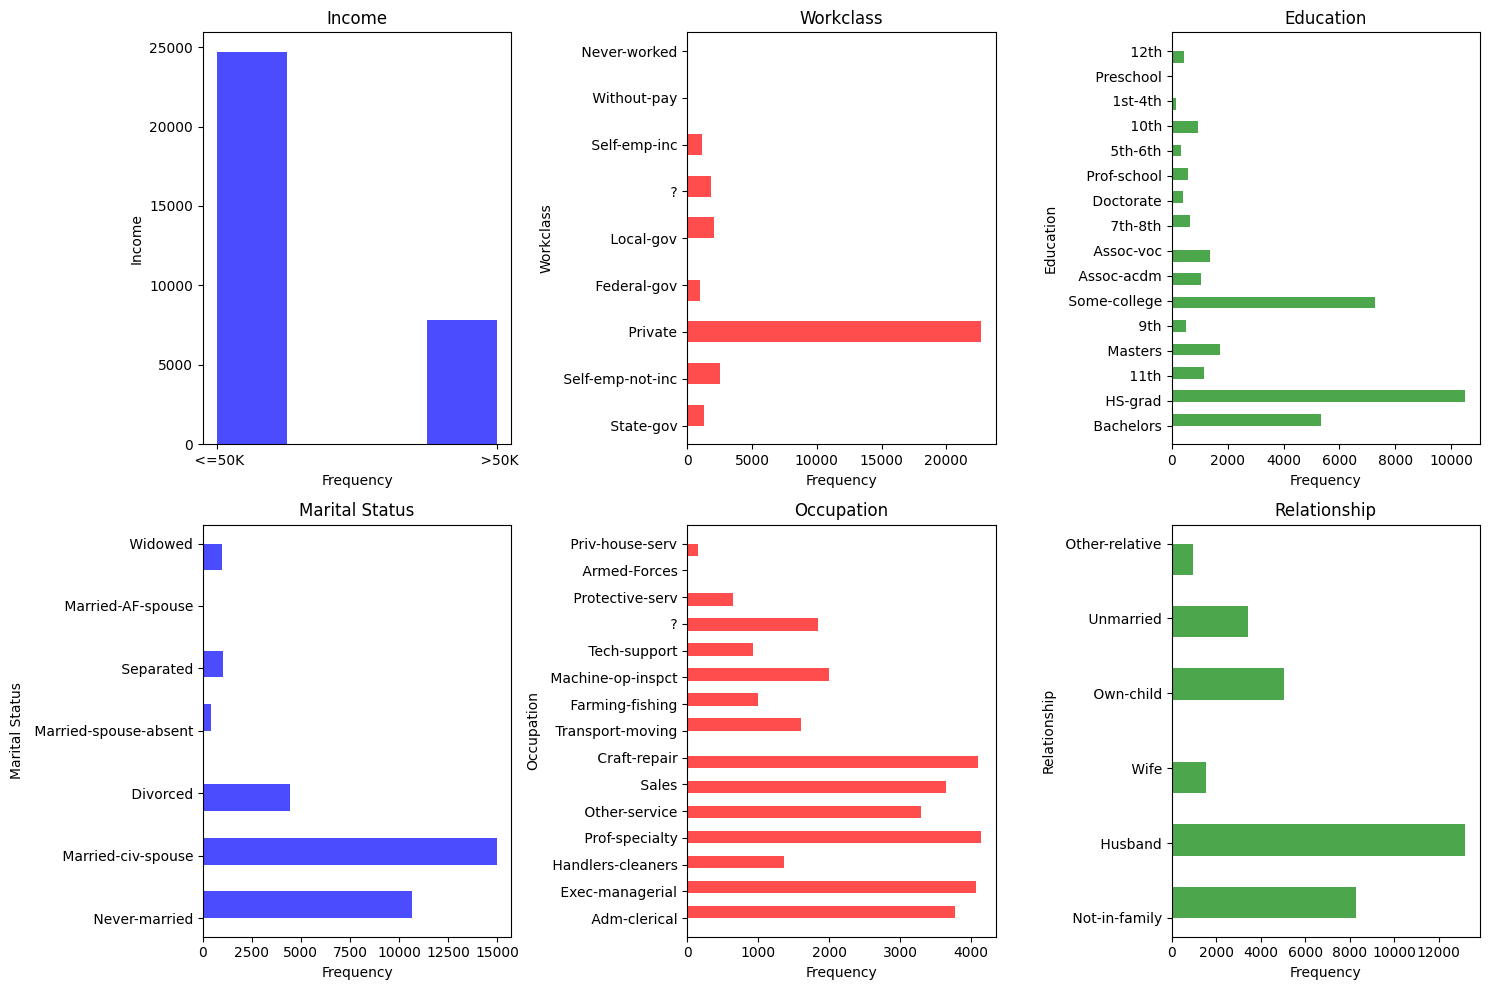

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].hist(df['income'], bins=df['income'].nunique()*2, color='blue', alpha=0.7)
axes[0, 0].set_title('Income')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Income')

axes[0, 1].hist(df['workclass'], bins=df['workclass'].nunique()*2, color='red', alpha=0.7, orientation='horizontal')
axes[0, 1].set_title('Workclass')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Workclass')

axes[0, 2].hist(df['education'], bins=df['education'].nunique()*2, color='green', alpha=0.7, orientation='horizontal')
axes[0, 2].set_title('Education')
axes[0, 2].set_xlabel('Frequency')
axes[0, 2].set_ylabel('Education')

axes[1, 0].hist(df['marital_status'], bins=df['marital_status'].nunique()*2, color='blue', alpha=0.7, orientation='horizontal')
axes[1, 0].set_title('Marital Status')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Marital Status')

axes[1, 1].hist(df['occupation'], bins=df['occupation'].nunique()*2, color='red', alpha=0.7, orientation='horizontal')
axes[1, 1].set_title('Occupation')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Occupation')

axes[1, 2].hist(df['relationship'], bins=df['relationship'].nunique()*2, color='green', alpha=0.7, orientation='horizontal')
axes[1, 2].set_title('Relationship')
axes[1, 2].set_xlabel('Frequency')
axes[1, 2].set_ylabel('Relationship')

plt.tight_layout()
plt.show()

# [Benja]

In [51]:
df.groupby(['workclass'])['workclass'].count()
# [Lucas]

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64

In [52]:
df.groupby(['marital_status'])['marital_status'].count()
# [Lucas]

marital_status
Divorced                  4441
Married-AF-spouse           23
Married-civ-spouse       14970
Married-spouse-absent      418
Never-married            10667
Separated                 1025
Widowed                    993
Name: marital_status, dtype: int64

### Graficos multivariados

Text(0.5, 1.0, 'Distribución Education Num vs Income')

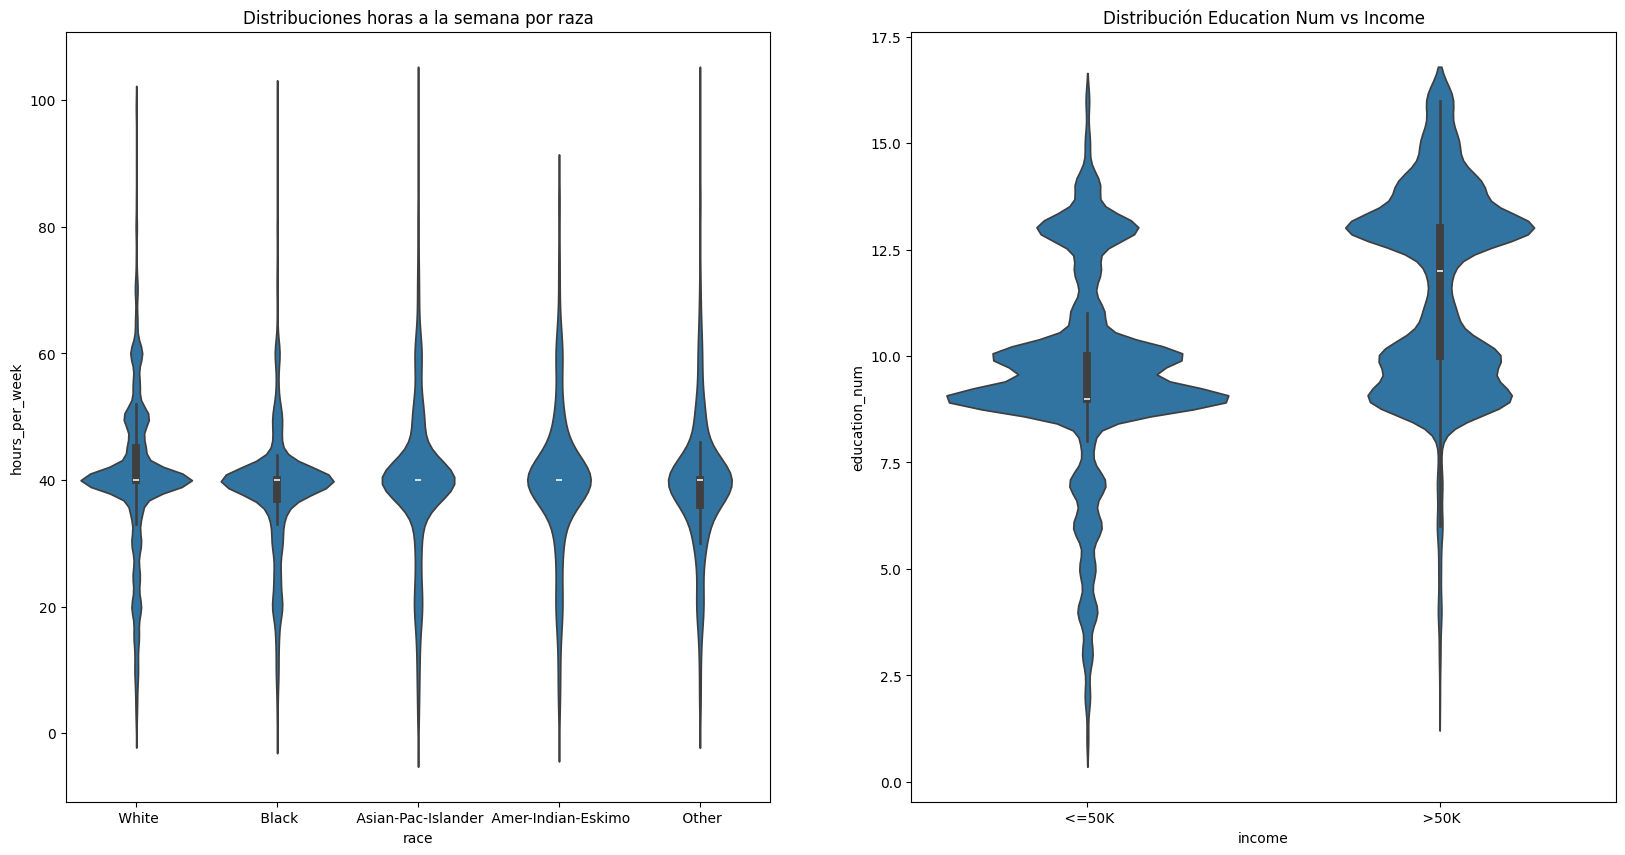

In [53]:
# violint matrix chart horas a la semana vs raza y educación vs income
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.violinplot(x='race', y='hours_per_week', data=df)
plt.title('Distribuciones horas a la semana por raza')

plt.subplot(1, 2, 2)
sns.violinplot(x='income', y='education_num', data=df)
plt.title('Distribución Education Num vs Income')

# [Benja]

Con respecto al gráfico de education_num vs income, se puede notar una clara diferencia en las distribuciones, siendo la clase '>50K' la que tiene valores de education_num desde 7.5 hacia arriba, con dos grandes grupos. Por el lado de la clase '<=50K', hay una gran parte de la población con education_num entre 8 y 11 aproximadamente.

Con respecto al gráfico de hours_per_week vs race, notamos dos formas predominantes. Una corresponde a las clases 'White' y 'Black', que tienen una moda altamente predominante. Para la segunda forma, tienen modas similares pero se observa una desviación estándar mayor.

[Benja]

Text(0.5, 1.0, 'Distribución Capital Gain vs Income')

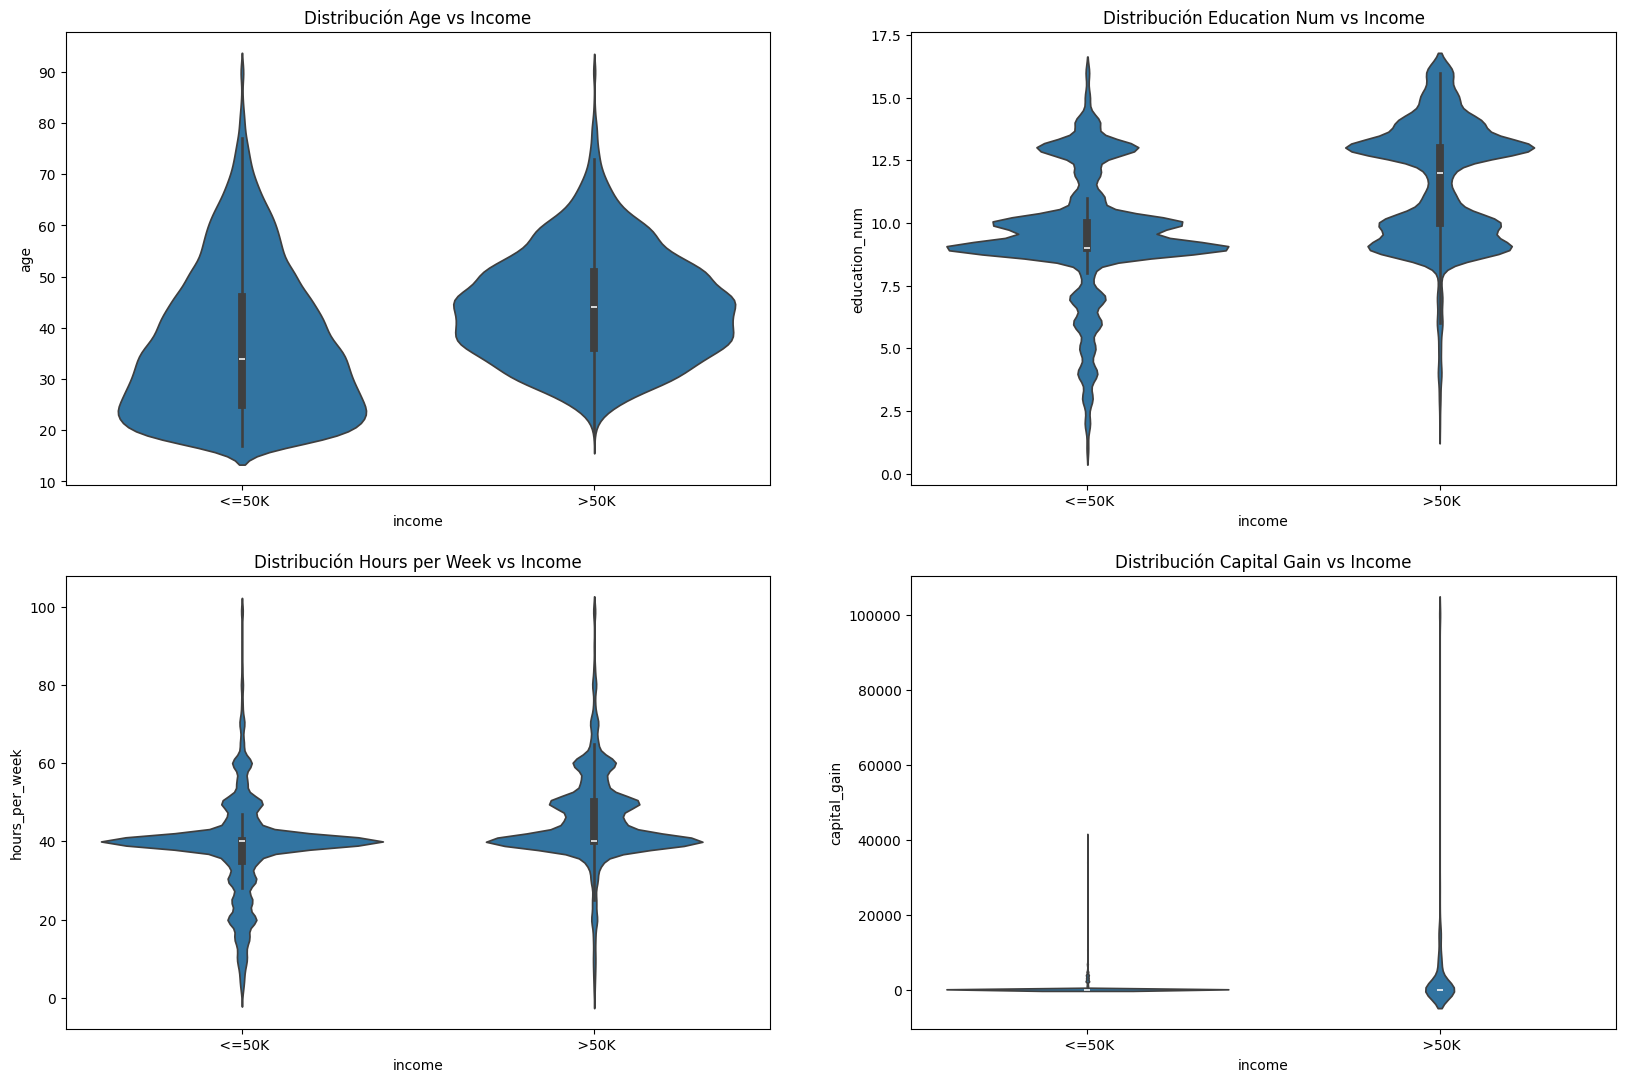

In [54]:
# violin chart matrix
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
sns.violinplot(x='income', y='age', data=df)
plt.title('Distribución Age vs Income')

plt.subplot(3, 2, 2)
sns.violinplot(x='income', y='education_num', data=df)
plt.title('Distribución Education Num vs Income')

plt.subplot(3, 2, 3)
sns.violinplot(x='income', y='hours_per_week', data=df)
plt.title('Distribución Hours per Week vs Income')

plt.subplot(3, 2, 4)
sns.violinplot(x='income', y='capital_gain', data=df)
plt.title('Distribución Capital Gain vs Income')

# [Benja]

<Axes: title={'center': 'Average education level by race'}, xlabel='race', ylabel='education level'>

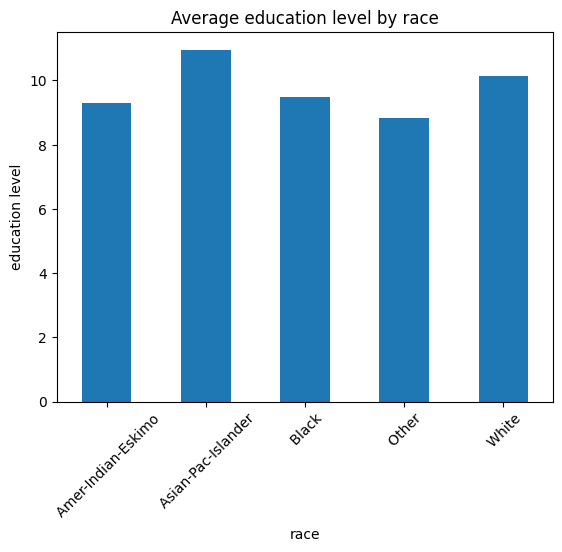

In [55]:
# nivel de educación promedio por raza

groupby_race_education_num = df.groupby('race')['education_num'].mean()
groupby_race_education_num.plot(kind='bar', rot=45, title="Average education level by race", ylabel='education level')

# [Nico]

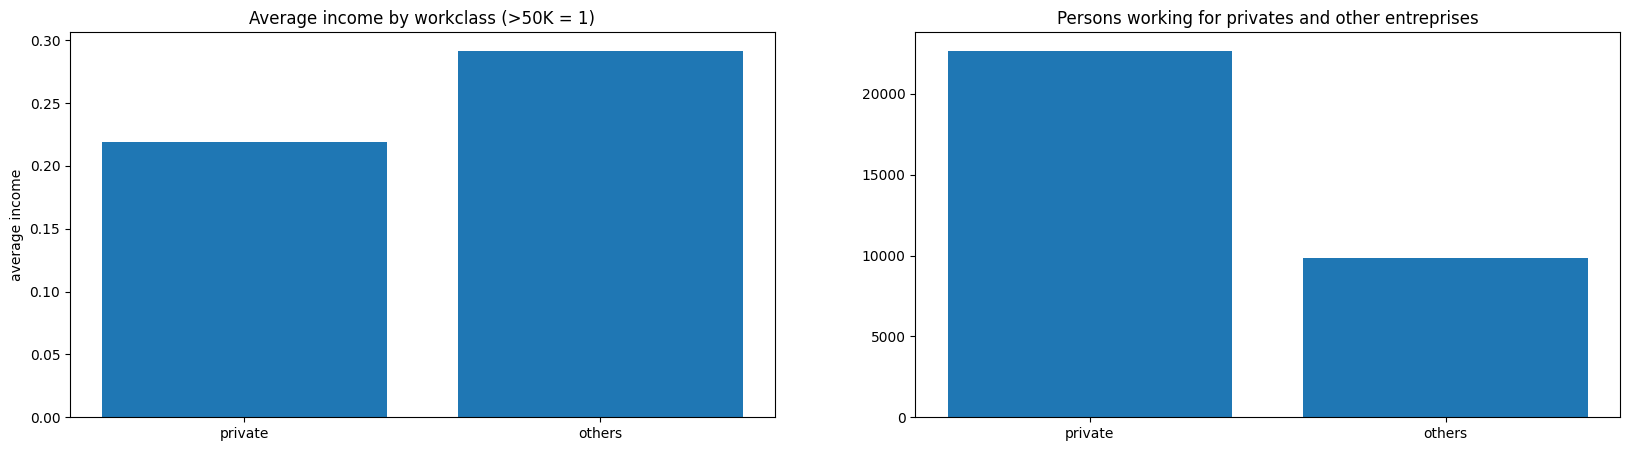

In [56]:
# ingreso promedio por clase de trabajo (privado u otros)

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
private_workers = df[df['workclass'].str.strip() == 'Private']
other_workers = df[df['workclass'].str.strip() != 'Private']
private_class = private_workers['income'].str.strip() == ">50K"
other_class = other_workers['income'].str.strip() == ">50K"
avg_private = private_class.astype(int).mean()
avg_other = other_class.astype(int).mean()
plt.bar(['private', 'others'], [avg_private, avg_other])
plt.title('Average income by workclass (>50K = 1)')
plt.ylabel('average income')

plt.subplot(1, 2, 2)
plt.bar(['private', 'others'], [len(private_workers), len(other_workers)])
plt.title("Persons working for privates and other entreprises")

plt.show()

# [Nico]

En este gráfico se puede apreciar que, por una parte, en el sector privado el ingreso promedio es menor que en los demás sectores, pero por otra parte, la cantidad de gente que trabaja en ese sector es mucho mayor. Puede deberse a que en el sector privado suele haber más variedad de trabajos, lo que incluye trabajos con una peor remuneración.

[Nico]

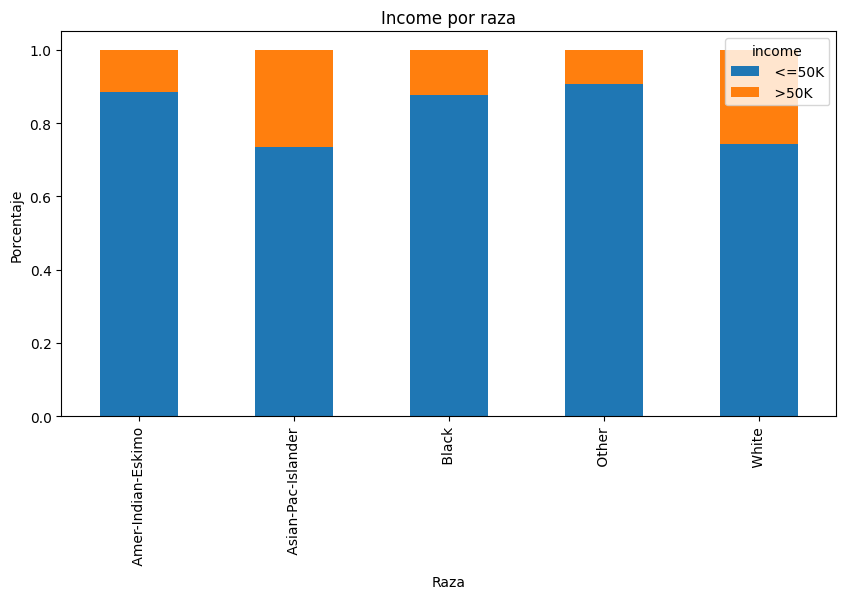

In [57]:
# income por raza porcentajes

df_groupby_race_income = df.groupby('race')['income'].value_counts(normalize=True).unstack()

# plot
df_groupby_race_income.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Income por raza')
plt.ylabel('Porcentaje')
plt.xlabel('Raza')
plt.show()

# [Thomas y Benja]

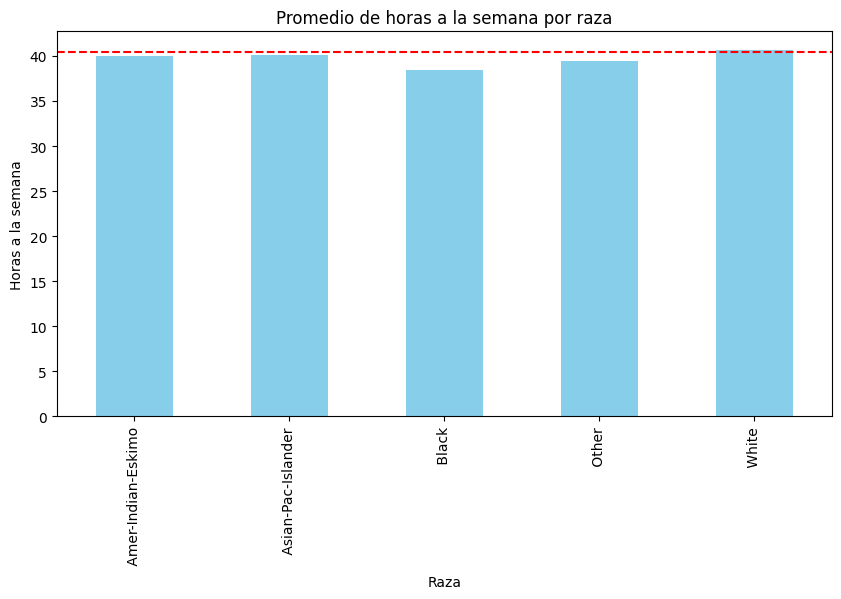

In [58]:
# hours per week per race

# Obtener el promedio de horas por semana por raza
df_groupby_race_hour = df.groupby('race')['hours_per_week'].mean()

# Gráfico de barras
df_groupby_race_hour.plot(kind='bar', figsize=(10, 5), color='skyblue')  # Cambiar color de las barras
# Añadir línea de promedio
plt.axhline(df['hours_per_week'].mean(), color='red', linestyle='--')
plt.title('Promedio de horas a la semana por raza')
plt.ylabel('Horas a la semana')
plt.xlabel('Raza')
plt.show()

# [Thomas]

### Matrices de correlación

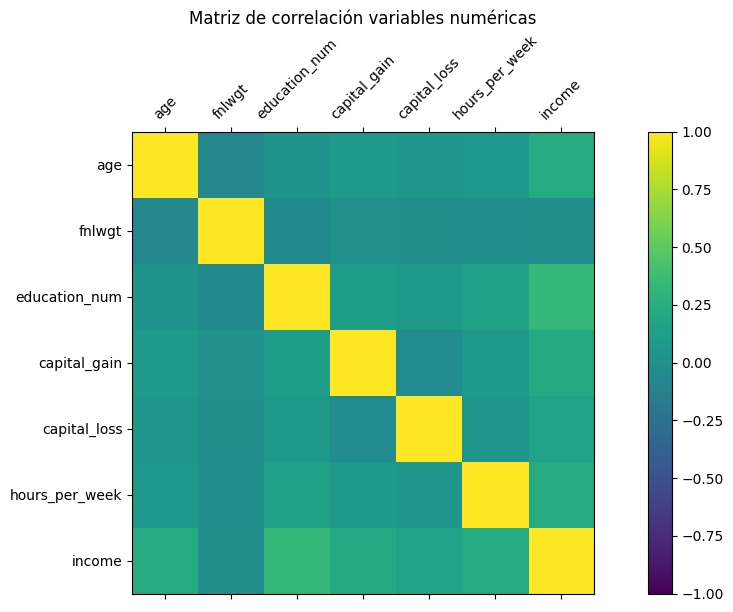

In [59]:
df_corr = df.copy()
df_corr['income'] = (df_corr['income'].str.strip() == ">50K").astype(int)
numeric = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
corr_mat = ax.matshow(df_corr[numeric].corr(), vmin=-1, vmax=1)
fig.colorbar(corr_mat)
ticks = range(0, len(numeric), 1)
ax.set_xticks(ticks, labels=numeric, rotation=45)
ax.set_yticks(ticks, labels=numeric)
plt.title("Matriz de correlación variables numéricas")
plt.show()

# [Nico]

Con respecto a la matriz de correlación, en particular para la variable de interés 'income', observamos principalmente una mayor correlación con 'education_num' y 'age'. Además notamos que no existen variables con correlaciones negativas, lo cual puede deberse al significado naturaleza de las variables (todas positivas)

Para encontrar la dependencia entre las variables categóricas no podemos usar correlación porque estas variables no son continuas. Es por eso que debemos usar el coeficiente V de Cramér, la cual asocia un número entre 0 (no dependientes) y 1 (completamente dependientes) a dos variables discretas.

Consideremos una muestra de tamaño $n$ de dos variables distribuidas simultáneamente $A$ y $B$, cada una con frecuencia $r$ y $k$, respectivamente.
El coeficiente $\chi^2$ corresponde a la prueba Chi Cuadrado de Pearson con la hipótesis nula _Las variables no tienen relación significativa_.

Ya con esto, el coeficiente V de Cramér se calcula por $$V = \sqrt{\frac{\chi^2/n}{\min(k-1, r-1)}}$$

Este coeficiente presenta el problema de ser un estimador sesgado, ya que tiende a sobreestimar la correlación entre las dos variables cuando la cantidad de observaciones es muy grande. Para evitar esto, se busca un menor error de estimación, lo que se logra al realizar la siguiente corrección, que además es la que se usó para encontrar la matriz más adelante: $\begin{align}\tilde{\varphi}^2 &= \max\left(0, \frac{\chi^2}{n} - \frac{(k-1)(r-1)}{n-1}\right) \\ \tilde{k} &= k - \frac{(k-1)^2}{n-1} \\ \tilde{r} &= r - \frac{(r-1)^2}{n-1}\end{align}$

Tomando estas correcciones, el coeficiente V de Cramér se calcula finalmente por: $$\tilde{V} = \sqrt{\frac{\tilde{\varphi}^2}{\min(\tilde{k}-1, \tilde{r}-1)}}$$

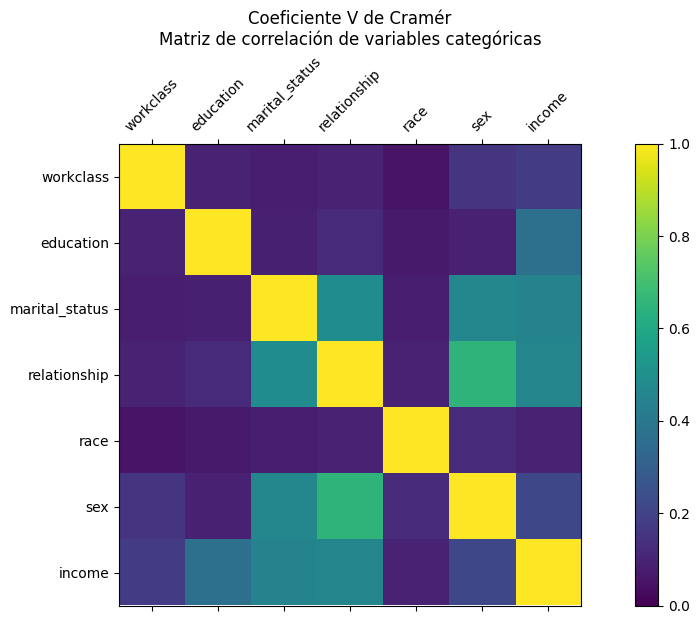

In [60]:
def cramerV(col1, col2):
    confusion_matrix = pd.crosstab(
        index=[col1],
        columns=[col2],
    ).to_numpy()
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

categorical = ['workclass', 'education', 'marital_status', 'relationship', 'race', 'sex', 'income']
df_cat = df.copy()
for col in categorical:
    df_cat[col] = df_cat[col].astype('category')

cramerV_matrix = np.identity(len(categorical), dtype=float)
for i in range(len(categorical)):
    for j in range(i, len(categorical)):
        cramerV_coef = cramerV(df_cat[categorical[i]], df_cat[categorical[j]])
        cramerV_matrix[i, j] = cramerV_coef
        cramerV_matrix[j, i] = cramerV_coef

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
corr_mat = ax.matshow(cramerV_matrix, vmin=0, vmax=1)
fig.colorbar(corr_mat)
ticks = np.arange(0, len(categorical), 1)
ax.set_xticks(ticks, labels=categorical, rotation=45)
ax.set_yticks(ticks, labels=categorical)
plt.title("Coeficiente V de Cramér\nMatriz de correlación de variables categóricas")
plt.show()

# [Nico]

De estas matrices se desprende que la edad, educación y estado marital son las variables más relacionadas al ingreso. La edad está relacionada con la experiencia laboral, el nivel de educación con lo que se requiere para un trabajo mejor remunerado, y el estado marital puede estar relacionado a que, en general, la gente más joven (que gana menos) no está casada, mientras que la gente mayor (ya con experiencia y más estudios, por ende ganando más) si es más probable que esté casada.

[Nico]

## Preguntas


Las preguntas planteadas a continuación se separan en dos partes, las primeras son relacionadas a modelos de clasificación y las segundas a modelos de segmentación. Cada una de las preguntas se aborda con una serie de experimentos que buscan responder a las preguntas planteadas.

### Enfoque en clasiﬁcación

- ¿Cuál es el impacto de descartar las variables sex/race para realizar una predicción/clasificación sobre la variable ‘Income’?

- ¿Se pueden predecir los ingresos utilizando solo las variables que no se pueden cambiar (por ejemplo, edad, raza, sexo)?

-  Experimento: Buscar el mejor clasificador entre Random Forest, SVM Classifier y Naive Bayes, usando todos los atributos. Luego, eliminar sexo/raza de los atributos y contrastar cómo cambian las métricas de clasificación. 

- Preprocesamiento: Escalado de variables numericas y codificación de categoricas. Se realizará Oversampling y Subsampling

- Modelos: DT, SVM, NB

### Enfoque de segmentación

In [1]:
from aux_clustering import*

/Users/benjamin/Documents/GitHub/Proyecto_mineria_cc5205/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- ¿se pueden obtiener clusters con alta pureza? 
- ¿Cómo cambia el número de clusters óptimos al excluir variables que no se pueden modificar?

- Experimento: Realizar segmentación con distintos modelos, identificando su número de clusters óptimo. Luego modificar las variables de entrada y analizar como varía dicho número.
- Preprocesamiento: Escalado de variables numéricas y codificación de categóricas.

- Modelos: K-Means, Método jerárquico aglomerativo, Gaussian Mixture


In [6]:
# import data
df_clustering = pd.read_csv('adult.data.csv', header=None)
df_clustering.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
print('Cantidad de registros: ', df_clustering.shape[0])
df_clustering.dropna(inplace=True)

# drop columnas que no nos interesan 
df_clustering.drop(['fnlwgt', 'native_country', 'education'], axis=1, inplace=True)

# segmentacion de columnas
num_cols = df_clustering.select_dtypes(include=['int64']).columns
cat_cols = df_clustering.select_dtypes(include=['object']).columns
print('Columnas numericas: ', num_cols, '\nColumnas categoricas: ', cat_cols)

Cantidad de registros:  32561
Columnas numericas:  Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object') 
Columnas categoricas:  Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'income'],
      dtype='object')


In [9]:
# preprocesamiento 

df_full = df_clustering.copy().sample(1000, random_state=42)
df_full_scaled = preprocess(df = df_full,
                            scaler_method_name ='PowerTransform',
                            numerical_cols = num_cols,
                            encoder_method_name = 'OneHotEncoder',
                            categorical_cols = cat_cols)

df_reduced = df_clustering.copy().sample(1000, random_state=42)
df_reduced.drop(['sex', 'race'], axis=1, inplace=True)
df_reduced_scaled = preprocess(df = df_reduced,
                            scaler_method_name ='PowerTransform',
                            numerical_cols = num_cols,
                            encoder_method_name = 'OneHotEncoder',
                            categorical_cols = cat_cols)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


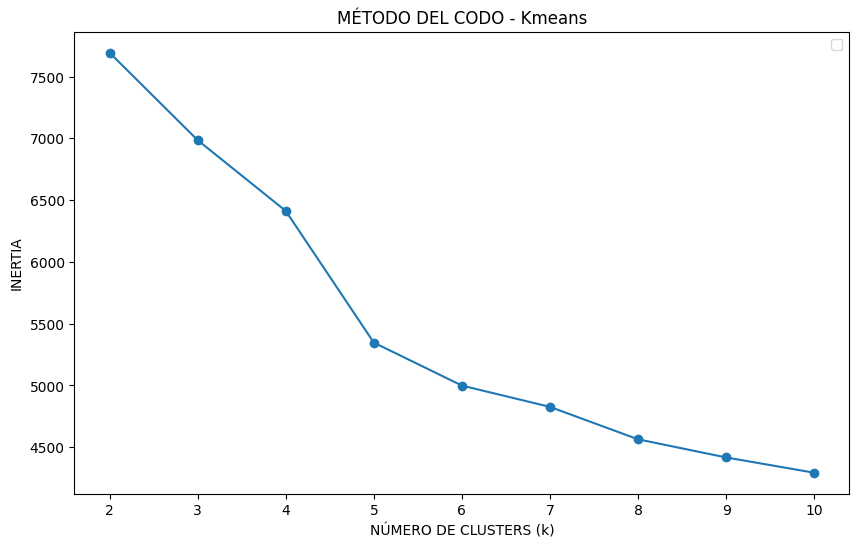

In [8]:
# Kmeans Clustering elbow
model = 'Kmeans'
dataset = 'Full'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)

# metodo de silhouete score
k_means_elbow(df = df_full_scaled, model_name = model, output_file_path = output_path + '/elbow.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


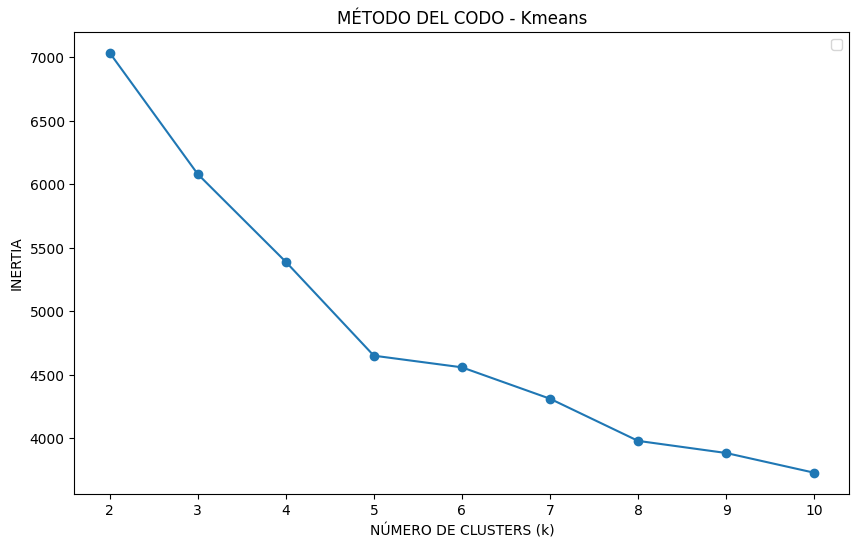

In [10]:
# Kmeans Clustering elbow
model = 'Kmeans'
dataset = 'Reduced'
output_path = 'resultados/' + dataset + '_' + model

# folder de salida
if not os.path.exists(output_path):
    os.makedirs(output_path)

# metodo de silhouete score
k_means_elbow(df = df_reduced_scaled, model_name = model, output_file_path = output_path + '/elbow.png')